## Crop Disease Detection Project

### Problem statement 

Crop diseases are a leading cause of reduced agricultural productivity worldwide, 
especially in regions where access to expert diagnosis is limited.
 Farmers often struggle to identify diseases early, resulting in significant 
yield loss and increased use of harmful chemicals. 
This project proposes a deep learning solution using Convolutional Neural Networks (CNNs) 
to detect and classify crop diseases from leaf images. The goal is to provide an accessible, 
image-based diagnostic tool that empowers farmers with timely, accurate disease identification.

### Objectives

1. Build a CNN model to classify crop diseases from leaf image.
2. Develop NLP methods to analyze farmers’ textual symptom descriptions.
3. Integrate CNN and NLP outputs into a single multimodal diagnostic model.
4. Compare multimodal performance to image-only and text-only models.
5. create a user-friendly app for farmers to upload photos and symptoms for instant diagnosis.

### Preprocessing

In [31]:
os.listdir(data_path)

['Tomato_Bacterial_spot',
 'Tomato__Tomato_mosaic_virus',
 'Pepper__bell___healthy',
 'Tomato_healthy',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_Septoria_leaf_spot',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Tomato_Leaf_Mold',
 'Potato___healthy',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato__Target_Spot',
 'Pepper__bell___Bacterial_spot']

In [32]:
import os
from collections import defaultdict

data_path = "/home/margaret/Phase-4-project/PlantVillage/"

class_counts = defaultdict(int)

for class_name in os.listdir(data_path):
    class_folder = os.path.join(data_path, class_name)
    if os.path.isdir(class_folder):
        count = len([file for file in os.listdir(class_folder) if file.endswith(('.jpg', '.png'))])
        class_counts[class_name] = count

# Print number of images per class
for cls, count in sorted(class_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{cls}: {count} images")


Tomato_Late_blight: 152 images
Pepper__bell___healthy: 2 images
Tomato_healthy: 1 images
Tomato_Bacterial_spot: 0 images
Tomato__Tomato_mosaic_virus: 0 images
Tomato_Spider_mites_Two_spotted_spider_mite: 0 images
Tomato_Septoria_leaf_spot: 0 images
Potato___Early_blight: 0 images
Potato___Late_blight: 0 images
Tomato_Leaf_Mold: 0 images
Potato___healthy: 0 images
Tomato__Tomato_YellowLeaf__Curl_Virus: 0 images
Tomato_Early_blight: 0 images
Tomato__Target_Spot: 0 images
Pepper__bell___Bacterial_spot: 0 images


This counts how many images are in each folder in the PlantVillage dataset.It also helps us to identify class imbalance

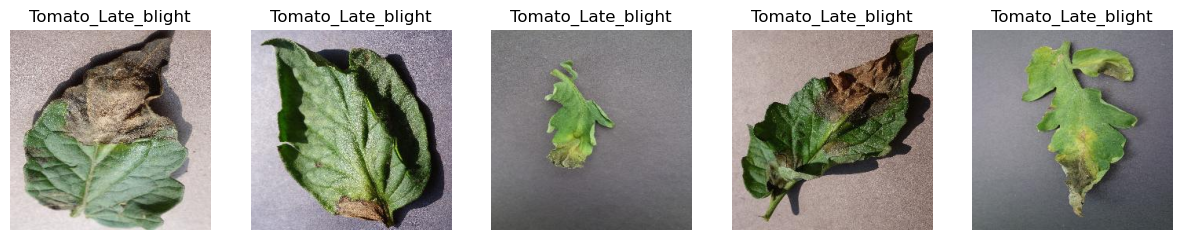

In [14]:
show_random_images("Tomato_Late_blight", n=5)


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

Displaying: /home/margaret/Phase-4-project/PlantVillage/Tomato_Late_blight/6b7f4762-88d6-4e85-8fad-57ca4083ec89___GHLB_PS Leaf 8.1 Day 9.jpg


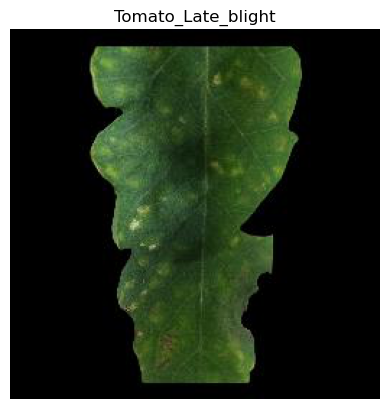

In [28]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import random

data_path = "/home/margaret/Phase-4-project/PlantVillage"
class_name = "Tomato_Late_blight"

folder = os.path.join(data_path, class_name)
images = [img for img in os.listdir(folder) if img.endswith(('.jpg', '.png'))]
img_path = os.path.join(folder, random.choice(images))

print("Displaying:", img_path)

img = Image.open(img_path).convert('RGB')

plt.imshow(img)
plt.title(class_name)
plt.axis('off')
plt.show()


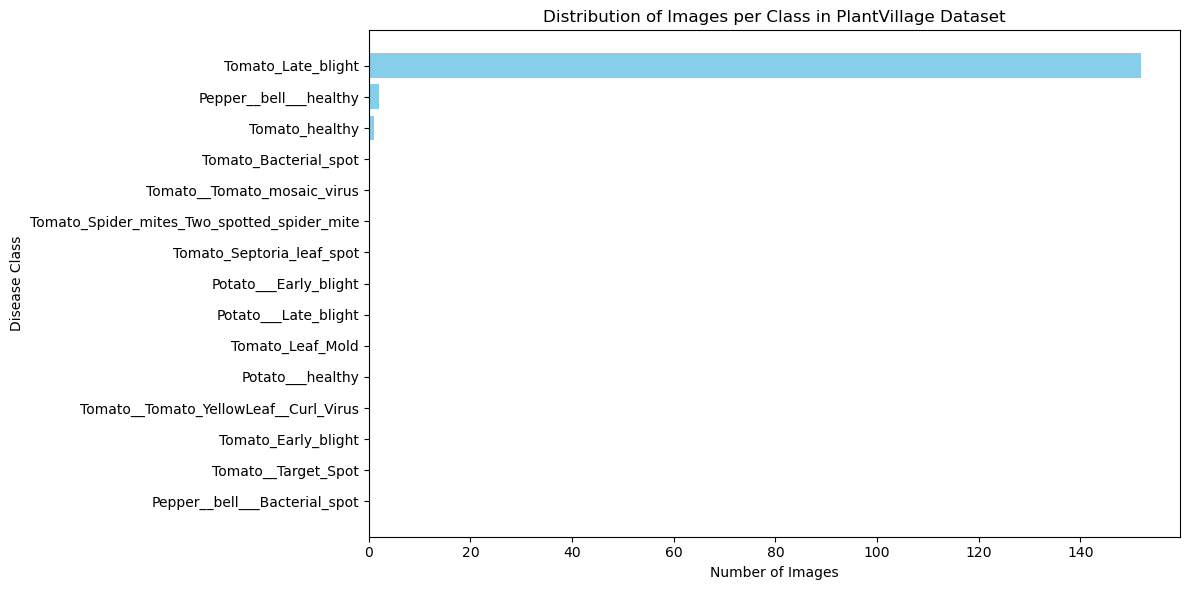

In [33]:
import matplotlib.pyplot as plt

# Sort class counts by number of images
sorted_counts = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
classes = [item[0] for item in sorted_counts]
counts = [item[1] for item in sorted_counts]

# Plot
plt.figure(figsize=(12, 6))
plt.barh(classes, counts, color="skyblue")
plt.xlabel("Number of Images")
plt.ylabel("Disease Class")
plt.title("Distribution of Images per Class in PlantVillage Dataset")
plt.gca().invert_yaxis()  # highest on top
plt.tight_layout()
plt.show()


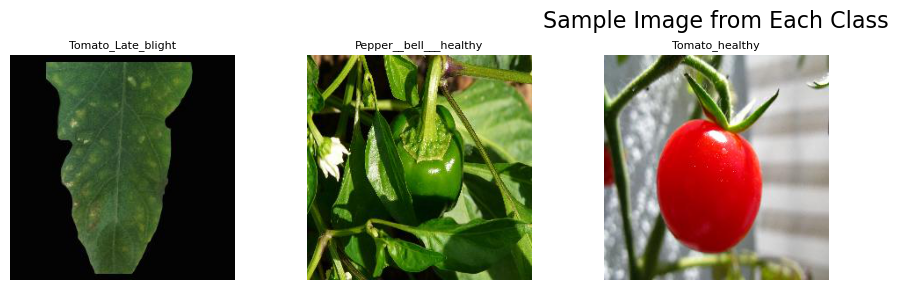

In [35]:
from PIL import Image

n_classes = len(classes)
cols = 5
rows = (n_classes + cols - 1) // cols

plt.figure(figsize=(15, rows * 2.5))

for i, class_name in enumerate(classes):
    class_folder = os.path.join(data_path, class_name)
    image_files = [f for f in os.listdir(class_folder) if f.endswith(('.jpg', '.png'))]
    if not image_files:
        continue
    img_path = os.path.join(class_folder, image_files[0])  # first image in folder
    img = Image.open(img_path).convert("RGB")
    
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(class_name, fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.suptitle("Sample Image from Each Class", fontsize=16, y=1.02)
plt.show()


/tmp/ipykernel_9932/3390345192.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_counts, y=top_classes, palette="viridis")


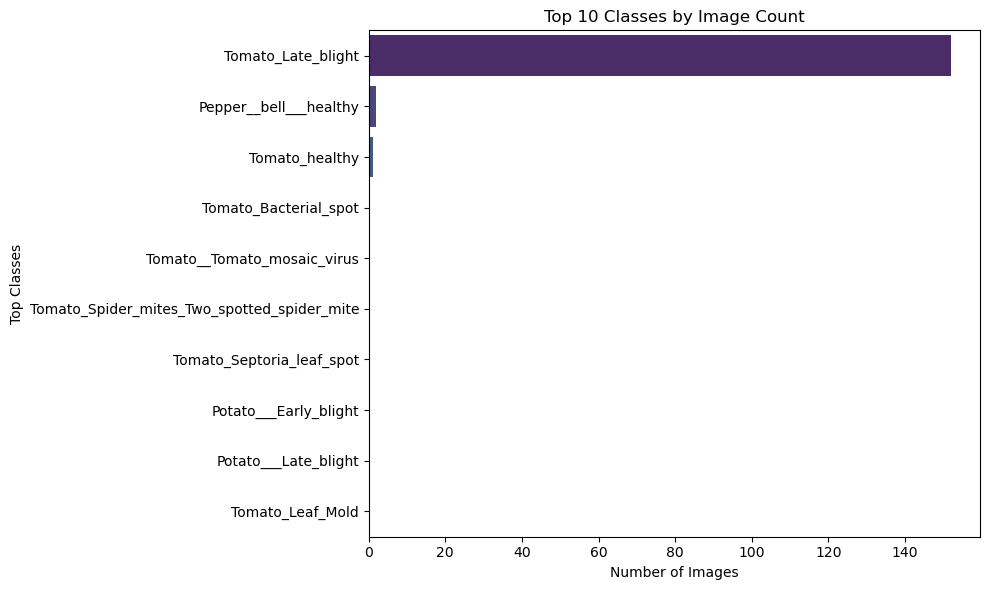

In [36]:
import seaborn as sns

top_n = 10  # Show top 10 classes
top_classes = classes[:top_n]
top_counts = counts[:top_n]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_counts, y=top_classes, palette="viridis")
plt.xlabel("Number of Images")
plt.ylabel("Top Classes")
plt.title("Top 10 Classes by Image Count")
plt.tight_layout()
plt.show()
